In [84]:
from PIL import Image, ImageDraw, ImageFont,ImageOps
import numpy as np
import glob
import pandas as pd
import math

In [85]:
# ディレクトリのパスを指定
directory_path = '../data'

# 指定されたディレクトリ内のすべてのファイルリストを取得
image_urls = glob.glob(f'{directory_path}/*.jpg')


image_urls.sort()
# ファイルリストを表示
print(image_urls)

['../data/20240927215850.jpg', '../data/20240927215851_000.jpg', '../data/20240927215851_001.jpg', '../data/20240927215852.jpg', '../data/20240927215853.jpg', '../data/20240927215854.jpg', '../data/20240927215855_000.jpg', '../data/20240927215855_001.jpg', '../data/20240927215856.jpg', '../data/20240927215857.jpg', '../data/20240927215858_000.jpg', '../data/20240927215858_001.jpg', '../data/20240927215859.jpg', '../data/20240927220011.jpg', '../data/20240927220012.jpg', '../data/20240927220013_000.jpg', '../data/20240927220013_001.jpg', '../data/20240927220014.jpg', '../data/20240927220015.jpg', '../data/20240927220016.jpg', '../data/20240927220017_000.jpg', '../data/20240927220017_001.jpg', '../data/20240927220018.jpg', '../data/20240927220019.jpg', '../data/20240927220020.jpg', '../data/20240927220021.jpg', '../data/20240927220132_000.jpg', '../data/20240927220132_001.jpg', '../data/20240927220133.jpg', '../data/20240927220134.jpg', '../data/20240927220135.jpg', '../data/202409272201

In [86]:
image_urls

['../data/20240927215850.jpg',
 '../data/20240927215851_000.jpg',
 '../data/20240927215851_001.jpg',
 '../data/20240927215852.jpg',
 '../data/20240927215853.jpg',
 '../data/20240927215854.jpg',
 '../data/20240927215855_000.jpg',
 '../data/20240927215855_001.jpg',
 '../data/20240927215856.jpg',
 '../data/20240927215857.jpg',
 '../data/20240927215858_000.jpg',
 '../data/20240927215858_001.jpg',
 '../data/20240927215859.jpg',
 '../data/20240927220011.jpg',
 '../data/20240927220012.jpg',
 '../data/20240927220013_000.jpg',
 '../data/20240927220013_001.jpg',
 '../data/20240927220014.jpg',
 '../data/20240927220015.jpg',
 '../data/20240927220016.jpg',
 '../data/20240927220017_000.jpg',
 '../data/20240927220017_001.jpg',
 '../data/20240927220018.jpg',
 '../data/20240927220019.jpg',
 '../data/20240927220020.jpg',
 '../data/20240927220021.jpg',
 '../data/20240927220132_000.jpg',
 '../data/20240927220132_001.jpg',
 '../data/20240927220133.jpg',
 '../data/20240927220134.jpg',
 '../data/202409272201

In [87]:
# トリミング関数（トリミングする周辺領域パーセント指定）
def crop_center(pil_img, crop_area):
    img_width, img_height = pil_img.size
    crop_width = int(img_width * (1-crop_area))
    crop_height = int(img_height * (1-crop_area))
    return pil_img.crop(((img_width - crop_width) // 2,
                         170,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))
    # return pil_img.crop(((img_width - crop_width) // 2,
    #                      (img_height - crop_height) // 2,
    #                      (img_width + crop_width) // 2,
    #                      (img_height + crop_height) // 2))

# 特定値より濃い値を算出
def calc_darkarea(image_url,threshold,crop_area):
    # 画像を読み込み、グレースケールに変換
    image = Image.open(image_url).convert('L')

    # 画像を切り抜き
    croped_image = crop_center(image,crop_area)

    # 画像をnumpy配列に変換
    image_array = np.array(croped_image)
    
    # しきい値を設定
    threshold = threshold

    # しきい値よりも濃い（暗い）ピクセルの数をカウント
    dark_pixels = np.sum(image_array <= threshold)

    # 全体のピクセル数を取得
    total_pixels = image_array.size

    # 濃いピクセルの割合を計算
    dark_pixel_ratio = dark_pixels / total_pixels

    return (image_url.split('/')[-1].split('.')[0],dark_pixel_ratio)


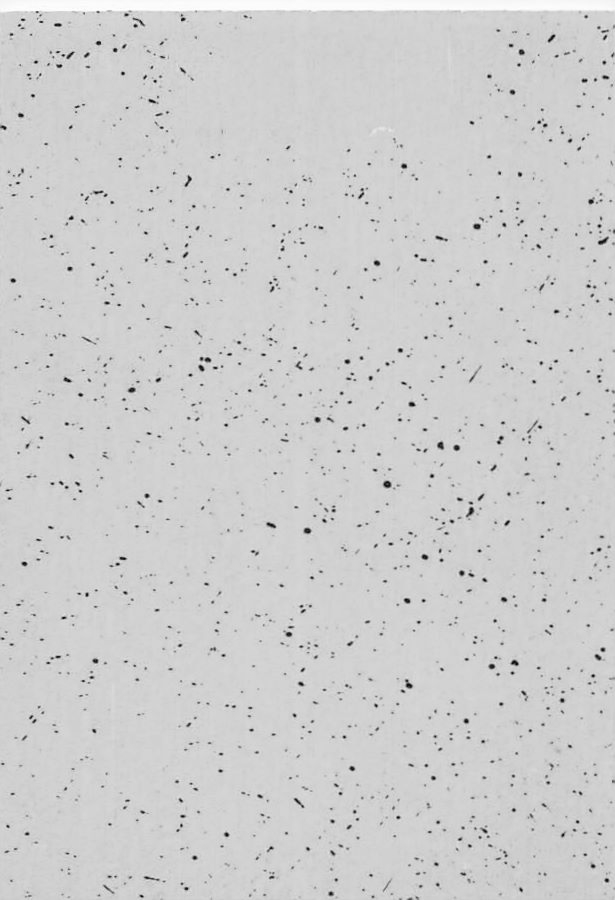

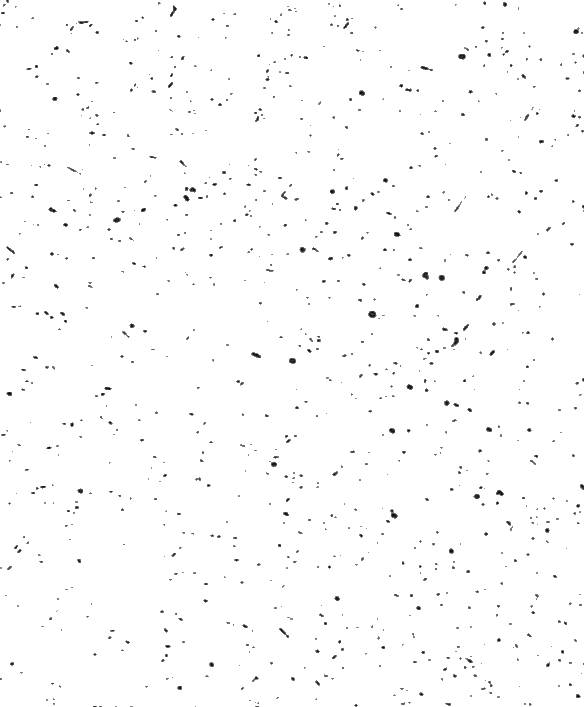

In [88]:
# トリミング状況の確認（適切なcrop_areaとthresholdを設定）

# トリミングする周辺領域を100分率で指定 
crop_area = 0.05
# しきい値の設定
threshold =150
path = '../data/20240927222556.jpg'
image = Image.open(path).convert('L')
# image = Image.open(image_urls[0]).convert('L')
# 画像をnumpy配列に変換
image_array = np.array(image)
# 新しい画像を作成し、しきい値以下のピクセルのみを残し、他は255（白）に設定
threshold_image_array = np.where(image_array <= threshold, image_array, 255)
# numpy配列を画像に戻す
threshold_image = Image.fromarray(threshold_image_array)

image.show()
crop_center(threshold_image, crop_area)

In [102]:
df = pd.DataFrame(columns=['filename','value'])
threshold = 150
crop_area = 0.05

for index, image_url in enumerate(image_urls):
    filename,value = calc_darkarea(image_urls[index],threshold,crop_area)
    df.loc[len(df)] = {'filename':filename,'value':value}

df

,filename,value
0,20240927215850,0.000115
1,20240927215851_000,0.000015
2,20240927215851_001,0.000019
3,20240927215852,0.000029
4,20240927215853,0.000041
...,...,...
405,20240927223014,0.013332
406,20240927223015,0.003272
407,20240927223016,0.005550
408,20240927223017_000,0.006909


In [103]:
df.to_csv('../data/calc_result2.csv',float_format='%.10f',)

In [91]:
T25_1 = image_urls[0:65]
T25_2 = image_urls[65:130]
T30_1 = image_urls[130:195]
T30_2 = image_urls[195:260]
T50_1 = image_urls[260:335]
T50_2 = image_urls[335:410]

imagedata_dict = [
    {'name':'T25-1','images':T25_1, 'arrange_num':13},
    {'name':'T25_2','images':T25_2, 'arrange_num':13},
    {'name':'T30_1','images':T30_1, 'arrange_num':13},
    {'name':'T30_2','images':T30_2, 'arrange_num':13},
    {'name':'T50_1','images':T50_1, 'arrange_num':15},
    {'name':'T50_2','images':T50_2, 'arrange_num':15},
]

In [93]:
imagedata_dict[0]['images']

['../data/20240927215850.jpg',
 '../data/20240927215851_000.jpg',
 '../data/20240927215851_001.jpg',
 '../data/20240927215852.jpg',
 '../data/20240927215853.jpg',
 '../data/20240927215854.jpg',
 '../data/20240927215855_000.jpg',
 '../data/20240927215855_001.jpg',
 '../data/20240927215856.jpg',
 '../data/20240927215857.jpg',
 '../data/20240927215858_000.jpg',
 '../data/20240927215858_001.jpg',
 '../data/20240927215859.jpg',
 '../data/20240927220011.jpg',
 '../data/20240927220012.jpg',
 '../data/20240927220013_000.jpg',
 '../data/20240927220013_001.jpg',
 '../data/20240927220014.jpg',
 '../data/20240927220015.jpg',
 '../data/20240927220016.jpg',
 '../data/20240927220017_000.jpg',
 '../data/20240927220017_001.jpg',
 '../data/20240927220018.jpg',
 '../data/20240927220019.jpg',
 '../data/20240927220020.jpg',
 '../data/20240927220021.jpg',
 '../data/20240927220132_000.jpg',
 '../data/20240927220132_001.jpg',
 '../data/20240927220133.jpg',
 '../data/20240927220134.jpg',
 '../data/202409272201

In [94]:
def add_border_and_padding(image, border_size=5, padding_size=10):
    # 白い余白を追加
    image_with_padding = ImageOps.expand(image, border=padding_size, fill=(255, 255, 255))
    # image_with_padding = ImageOps.expand(image, border=padding_size, fill=255)
    
    return image_with_padding

In [95]:



image_list_col_length = int(len(T25_2) / 13)

image_list = [[] for _ in range(image_list_col_length)]
image_list

[[], [], [], [], []]

In [96]:
len(T25_2)

65

In [97]:
def arrange_images(file_list, arrange_num, file_name):
    image_list_col_length = int(len(file_list) / arrange_num)
    image_list = [[] for _ in range(image_list_col_length)]

    # imageを結合して保存
    for idx,file_path in enumerate(file_list):

        # トリミングする周辺領域を100分率で指定 
        crop_area = 0.05
        # しきい値の設定
        # threshold =150
        # image_L = Image.open(file_path).convert('L')
        # # 画像をnumpy配列に変換
        # image_numpy_array = np.array(image_L)
        # # 新しい画像を作成し、しきい値以下のピクセルのみを残し、他は255（白）に設定
        # threshold_image_array = np.where(image_numpy_array <= threshold, image_numpy_array, 255)
        # # numpy配列を画像に戻す
        # threshold_image = Image.fromarray(threshold_image_array)
        # image = add_border_and_padding(crop_center(threshold_image,crop_area))

        image = add_border_and_padding(crop_center(Image.open(file_path),crop_area))
        image_index = math.floor(idx / arrange_num)
        # 新たな配列を前にする
        image_list[-image_index-1].insert(0,image)

    image_list

    total_height = 0

    for row_image_list in image_list:
        widths, heights = zip(*(img.size for img in row_image_list))
        # 結合後の画像の幅と高さを計算
        total_width = sum(widths)
        max_height = max(heights)
        total_height += max_height

    # 新しい画像を作成（RGBモードで白背景）
    # new_image = Image.new('L', (total_width, total_height),color=255)
    new_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))

    # 各画像を新しい画像に貼り付け
    x_offset = 0
    y_offset = 0
    for row_image_list in image_list:
        widths, heights = zip(*(img.size for img in row_image_list))
        max_height = max(heights)
        for image in row_image_list:
            new_image.paste(image, (x_offset, y_offset))

            x_offset += image.width
        x_offset = 0
        y_offset += max_height

    # 結合した画像を表示
    # new_image.show()

    # 加工したimageの保存
    output_path = f'../data/{file_name}.jpeg'
    new_image.save(output_path)

In [99]:
for data in imagedata_dict:
    arrange_images(data['images'],data['arrange_num'],data['name'])